## Sandbox for interacting with the ARASAAC API

In [27]:
import requests
import seaborn as sns
from collections import Counter
import numpy as np
from PIL import Image
from io import BytesIO
#from IPython.display import display, Image, HTML
import pandas as pd
import matplotlib.pyplot as plt
import os
from tqdm import tqdm

In [13]:
base_url = "https://api.arasaac.org/api"
language = "en"



In [37]:

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

In [38]:
pd.reset_option('display.max_rows')

In [36]:
# To get a general sense of the categories in ARASAAC
def get_pictos(lang = "en", limit=500):
  url = f'{base_url}/pictograms/all/{lang}'
  response = requests.get(url)
  if response.status_code == 200:
    data = response.json()
    return data[:limit] if limit else data
  else:
    print(f'Error: {response.status_code}')
    return []

def get_keywords(pictograms):
  categories = []
  item_dict = {}
  for pictogram in pictograms:
    if 'categories' in pictogram and pictogram['categories']:
      for category in pictogram['categories']:
        categories.append(category)

        if category not in item_dict:
          item_dict[category] = []

        item_dict[category].append(pictogram['_id'])

  category_counts = Counter(categories)

  df_data = []

  for category, count in category_counts.most_common():
        sample_ids = item_dict[category][:3]
        
        sample_keywords = []
        for pic_id in sample_ids:
            for pic in pictograms:
                if pic["_id"] == pic_id and "keywords" in pic and pic["keywords"]:
                    sample_keywords.append(pic["keywords"][0]["keyword"] 
                                         if pic["keywords"][0]["keyword"] else "Unknown")
                    break
        
        df_data.append({
            "Category": category,
            "Pictogram Count": count,
            "Percentage": round((count / len(pictograms)) * 100, 2),
            "Sample Pictogram IDs": ", ".join(map(str, sample_ids)),
            "Sample Keywords": ", ".join(sample_keywords[:3])
        })
    
  df = pd.DataFrame(df_data)
  return df

print("Fetching pictograms data... (this may take a moment)")
pictograms = get_pictos(language)
print(f"Retrieved {len(pictograms)} pictograms")

categories_df = get_keywords(pictograms)
print("\nCategory Statistics:")
display(categories_df)






Fetching pictograms data... (this may take a moment)
Retrieved 500 pictograms

Category Statistics:


,Category,Pictogram Count,Percentage,Sample Pictogram IDs,Sample Keywords
0,core vocabulary-feeding,41,8.2,"2246, 2281, 2296","olive oil, sandwich, coffee"
1,verb,41,8.2,"2271, 2276, 2286","bathe, drink, erase"
2,core vocabulary-object,37,7.4,"2250, 2258, 2242","pillow, wardrobe, coat"
3,terrestrial animal,37,7.4,"2257, 2254, 2291","squirrel, spider, donkey"
4,core vocabulary-living being,36,7.2,"2254, 2291, 2268","spider, donkey, whale"
...,...,...,...,...,...
206,animal-based food,1,0.2,2720,cut the chicken
207,cosmetic,1,0.2,2747,nail varnish
208,dinosaur,1,0.2,2738,dinosaur
209,extinct being,1,0.2,2738,dinosaur


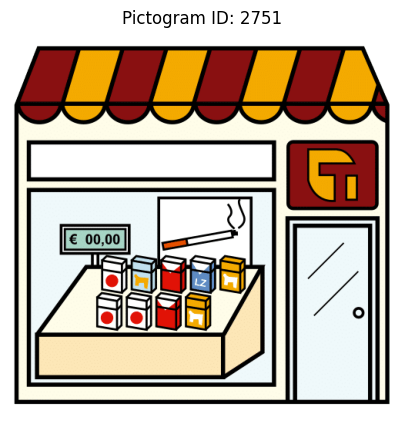

In [30]:
# we can visualize pictograms by passing the id and resolution to the api url
def print_picto(id, resolution=500):
  url = f'https://static.arasaac.org/pictograms/{id}/{id}_{resolution}.png'

  response = requests.get(url)
  if response.status_code == 200:
      img = Image.open(BytesIO(response.content))
      
      plt.figure(figsize=(5, 5))
      plt.imshow(img)
      plt.axis('off')
      plt.title(f"Pictogram ID: {id}")
      plt.show()
  else:
      print(f"Error: Could not retrieve pictogram {id}. Status code: {response.status_code}")

print_picto(2751)


In [ ]:
def get_metadata(pictogram_data):

In [ ]:
def print_grid(pico_files, out_file="layout.png", grid=(5, 5)):
  